In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch, spectrogram

file = open("eeg-data.txt", 'r')
data = file.readlines()
data = [float(sample) for sample in data]
eeg_data = np.array(data)

In [5]:
frequency_bands={ "delta" : (1, 4), "theta" : (4,8), "alpha" : (8, 13) ,"beta" : (13, 30)}

In [6]:
fs = 100
f, psd = welch(data, fs, nperseg=fs*2)

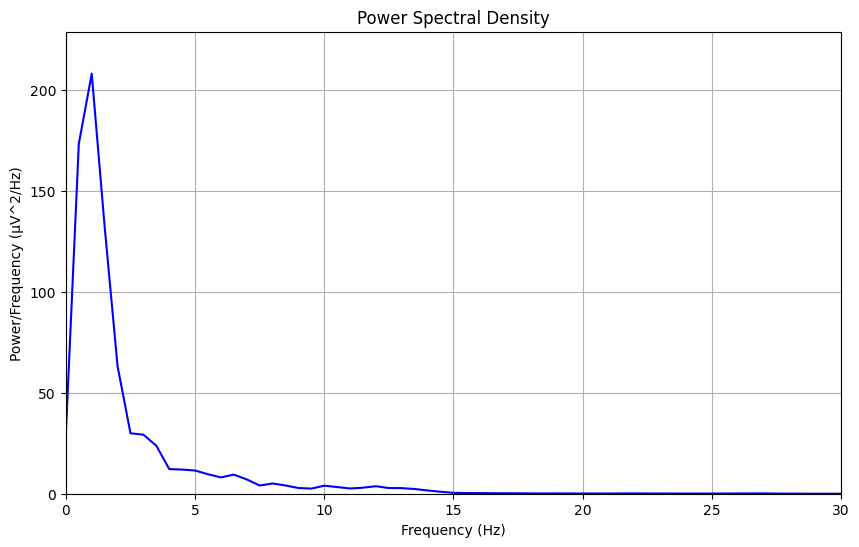

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(f, psd, color='blue')
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (µV^2/Hz)')
plt.xlim(0, 30)
plt.ylim(0, max(psd) * 1.1)
plt.grid(True)
plt.show()

In [19]:
absolute_bandpowers = {}
for band, (low, high) in frequency_bands.items():
    idx_band = np.where((f >= low) & (f < high))[0]
    bandpower = np.trapz(psd[idx_band], f[idx_band])
    absolute_bandpowers[band] = bandpower
print("Absolute Bandpowers : ")
for band,power in absolute_bandpowers.items():
    print(band.capitalize() , ":" , power)

Absolute Bandpowers : 
Delta : 185.06270360923074
Theta : 32.902277797631776
Alpha : 14.96305174023809
Beta : 5.312811554099252


In [28]:
total_power = sum(absolute_bandpowers.values())
relative_bandpowers={}
for band, power in absolute_bandpowers.items():
    relative_bandpowers[band] = power / total_power
print("Relative Bandpowers : ")
for band, power in relative_bandpowers.items():
    print(f"{band.capitalize()}: {power * 100:.2f}%")

Relative Bandpowers : 
Delta: 77.68%
Theta: 13.81%
Alpha: 6.28%
Beta: 2.23%
